In [134]:
import scipy
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.linear_model import BayesianRidge, Ridge
from sklearn.ensemble import RandomForestRegressor

from sklearn.impute import KNNImputer
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer, StandardScaler


In [135]:
train0 = pd.read_csv('C:/Users/hp/Documents/data-scientist-take-home/data/train.csv')
test0 = pd.read_csv('C:/Users/hp/Documents/data-scientist-take-home/data/test.csv')
target = train0['SalePrice']
train0.select_dtypes(np.number)

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,0,0,953,953,953,694,0,1647,0,0,2,1,3,1,7,1,1999.0,2,460,0,40,0,0,0,0,0,8,2007,175000
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,790,163,589,1542,2073,0,0,2073,1,0,2,0,3,1,7,2,1978.0,2,500,349,0,0,0,0,0,0,2,2010,210000
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,275,0,877,1152,1188,1152,0,2340,0,0,2,0,4,1,9,2,1941.0,1,252,0,60,0,0,0,0,2500,5,2010,266500
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49,1029,0,1078,1078,0,0,1078,1,0,1,0,2,1,5,0,1950.0,1,240,366,0,112,0,0,0,0,4,2010,142125


In [136]:
train0['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

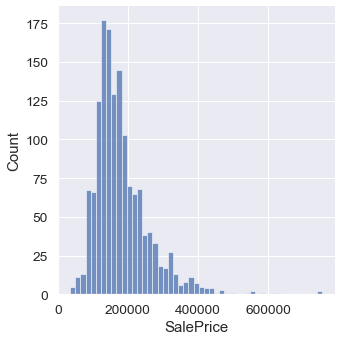

In [137]:
sns.displot(train0['SalePrice'])

In [138]:
print("Skewness: %f" % train0['SalePrice'].skew())

Skewness: 1.882876


In [139]:
print("Kurtosis: %f" % train0['SalePrice'].kurt())

Kurtosis: 6.536282


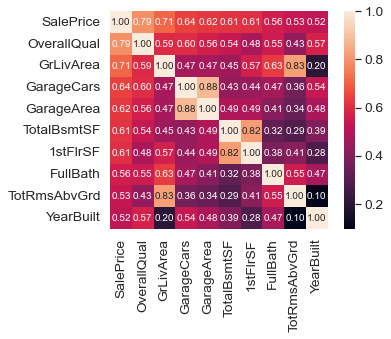

In [140]:
corrmat = train0.corr()
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train0[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

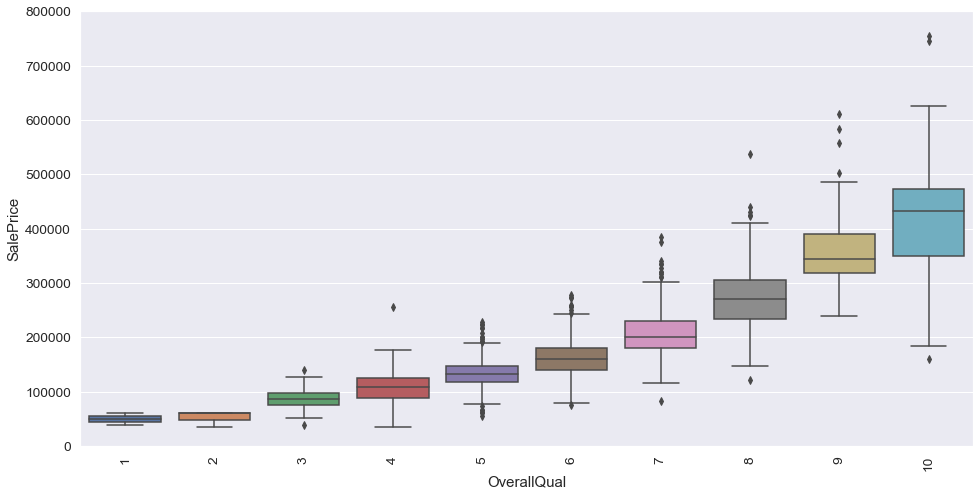

In [141]:
attr = 'OverallQual'
data = pd.concat([train0['SalePrice'], train0[attr]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=attr, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);
plt.xticks(rotation=90);

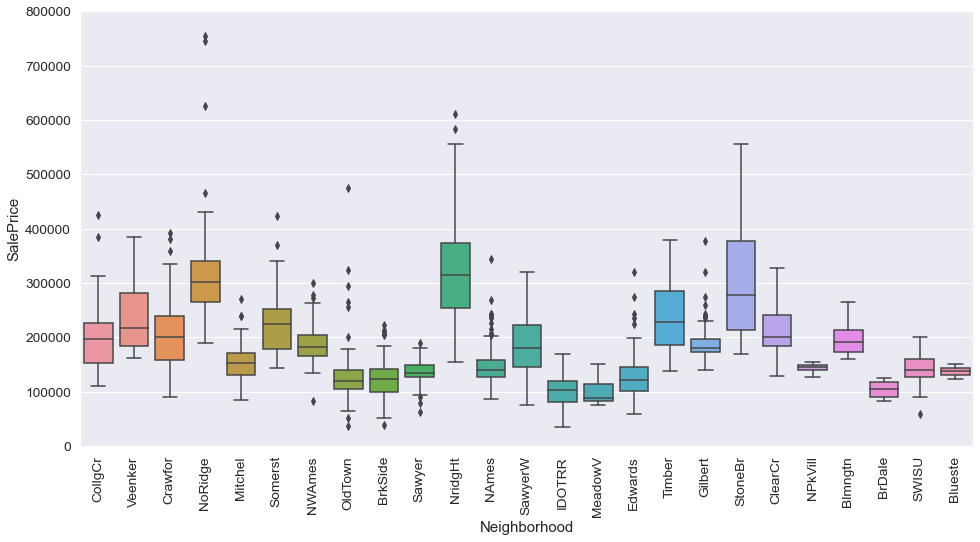

In [142]:
attr = 'Neighborhood'
data = pd.concat([train0['SalePrice'], train0[attr]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=attr, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);
plt.xticks(rotation=90);

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


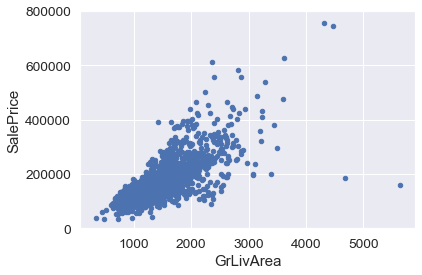

In [143]:
attr = 'GrLivArea'
data = pd.concat([train0['SalePrice'], train0[attr]], axis = 1)
data.plot.scatter(x=attr, y='SalePrice', ylim=(0, 800000));

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


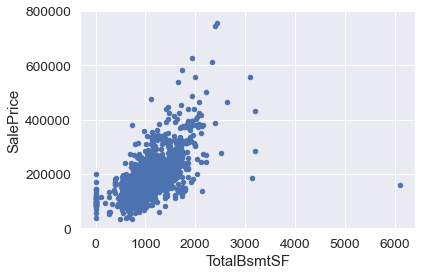

In [144]:
attr = 'TotalBsmtSF'
data = pd.concat([train0['SalePrice'], train0[attr]], axis = 1)
data.plot.scatter(x=attr, y='SalePrice', ylim=(0, 800000));

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


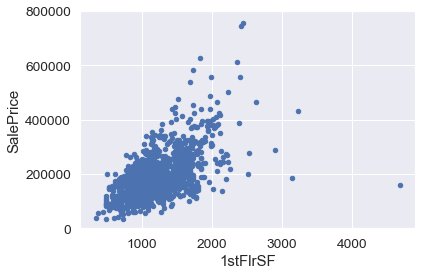

In [145]:
attr = '1stFlrSF'
data = pd.concat([train0['SalePrice'], train0[attr]], axis = 1)
data.plot.scatter(x=attr, y='SalePrice', ylim=(0, 800000));

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


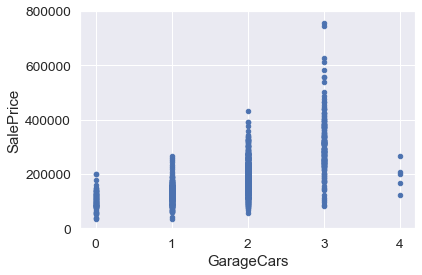

In [146]:
attr = 'GarageCars'
data = pd.concat([train0['SalePrice'], train0[attr]], axis = 1)
data.plot.scatter(x=attr, y='SalePrice', ylim=(0, 800000));

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


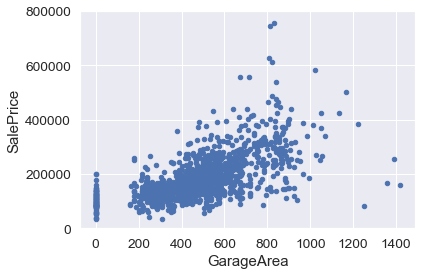

In [147]:
attr = 'GarageArea'
data = pd.concat([train0['SalePrice'], train0[attr]], axis = 1)
data.plot.scatter(x=attr, y='SalePrice', ylim=(0, 800000));

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


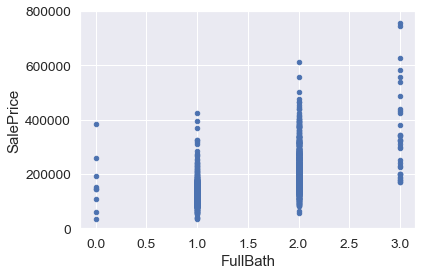

In [148]:
attr = 'FullBath'
data = pd.concat([train0['SalePrice'], train0[attr]], axis = 1)
data.plot.scatter(x=attr, y='SalePrice', ylim=(0, 800000));

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


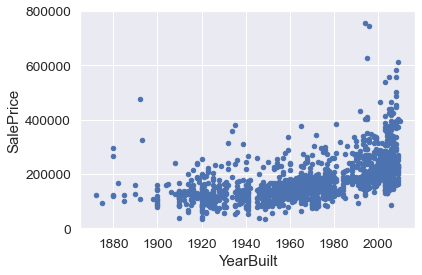

In [149]:
attr = 'YearBuilt'
data = pd.concat([train0['SalePrice'], train0[attr]], axis = 1)
data.plot.scatter(x=attr, y='SalePrice', ylim=(0, 800000));

In [150]:
train1 = train0.copy()
train1 = train1.drop(['Id', 'SalePrice'], axis=1)
test1 = test0.drop(['Id'], axis=1)
train1 = pd.concat([train1, test1], axis=0)
train_test_data = train1
train_test_data

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,7,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,546.0,546.0,GasA,Gd,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,5,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,4,5,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,252.0,Unf,0.0,294.0,546.0,GasA,TA,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,6,Typ,0,NaN,CarPort,1970.0,Unf,1.0,286.0,TA,TA,Y,0,24,0,0,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,7,1960,1996,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,1224.0,Unf,0.0,0.0,1224.0,GasA,Ex,Y,SBrkr,1224,0,0,1224,1.0,0.0,1,0,4,1,TA,7,Typ,1,TA,Detchd,1960.0,Unf,2.0,576.0,TA,TA,Y,474,0,0,0,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,SFoyer,5,5,1992,1992,Gable,CompShg,HdBoard,Wd Shng,None,0.0,TA,TA,PConc,Gd,TA,Av,GLQ,337.0,Un

In [151]:
train1['MSSubClass'] = train1['MSSubClass'].apply(str)
train1.select_dtypes(np.number) #35 columns as ID, SalePrice are removed and MSSubClass is 'str'

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,150.0,856.0,856,854,0,1710,1.0,0.0,2,1,3,1,8,0,2003.0,2.0,548.0,0,61,0,0,0,0,0,2,2008
1,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,284.0,1262.0,1262,0,0,1262,0.0,1.0,2,0,3,1,6,1,1976.0,2.0,460.0,298,0,0,0,0,0,0,5,2007
2,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,434.0,920.0,920,866,0,1786,1.0,0.0,2,1,3,1,6,1,2001.0,2.0,608.0,0,42,0,0,0,0,0,9,2008
3,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,540.0,756.0,961,756,0,1717,1.0,0.0,1,0,3,1,7,1,1998.0,3.0,642.0,0,35,272,0,0,0,0,2,2006
4,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,490.0,1145.0,1145,1053,0,2198,1.0,0.0,2,1,4,1,9,1,2000.0,3.0,836.0,192,84,0,0,0,0,0,12,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,21.0,1936,4,7,1970,1970,0.0,0.0,0.0,546.0,546.0,546,546,0,1092,0.0,0.0,1,1,3,1,5,0,NaN,0.0,0.0,0,0,0,0,0,0,0,6,2006
1455,21.0,1894,4,5,1970,1970,0.0,252.0,0.0,294.0,546.0,546,546,0,1092,0.0,0.0,1,1,3,1,6,0,1970.0,1.0,286.0,0,24,0,0,0,0,0,4,2006
1456,160.0,20000,5,7,1960,1996,0.0,1224.0,0.0,0.0,1224.0,1224,0,0,1224,1.0,0.0,1,0,4,1,7,1,1960.0,2.0,576.0,474,0,0,0,0,0,0,9,2006
1457,62.0,10441,5,5,1992,1992,0.0,337.0,0.0,575.0,912.0,970,0,0,970,0.0,1.0,1,0,3,1,6,0,NaN,0.0,0.0,80,32,0,0,0,0,700,7,2006


In [152]:
see_index = train1.select_dtypes('object').columns[train1.select_dtypes('object').isna().any()]
see_index.tolist()  #List of columns containing null values of categorical features

['MSZoning',
 'Alley',
 'Utilities',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType']

In [153]:
# For cloumns which missing values have some meaning 
for col in [
    'Alley',
    'BsmtQual',
    'BsmtCond',
    'BsmtExposure',
    'BsmtFinType1',
    'BsmtFinType2',
    'FireplaceQu',
    'GarageType',
    'GarageFinish',
    'GarageQual',
    'GarageCond',
    'PoolQC',
    'Fence',
    'MiscFeature'
]:
    train1[col] = train1[col].fillna("None")

# Removing the columns with no impactful meaning
column = [
    'MSZoning',
    'Utilities',
    'Exterior1st',
    'Exterior2nd',
    'MasVnrType',
    'Electrical',
    'KitchenQual',
    'Functional',
    'SaleType'
]
train1 = train1.drop(column, axis =  1)

In [154]:
train1

,MSSubClass,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleCondition
0,60,65.0,8450,Pave,None,Reg,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,856,854,0,1710,1.0,0.0,2,1,3,1,8,0,None,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,None,None,None,0,2,2008,Normal
1,20,80.0,9600,Pave,None,Reg,Lvl,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,1262,0,0,1262,0.0,1.0,2,0,3,1,6,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,None,None,None,0,5,2007,Normal
2,60,68.0,11250,Pave,None,IR1,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,920,866,0,1786,1.0,0.0,2,1,3,1,6,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,None,None,None,0,9,2008,Normal
3,70,60.0,9550,Pave,None,IR1,Lvl,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,961,756,0,1717,1.0,0.0,1,0,3,1,7,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,None,None,None,0,2,2006,Abnorml
4,60,84.0,14260,Pave,None,IR1,Lvl,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,1145,1053,0,2198,1.0,0.0,2,1,4,1,9,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,None,None,None,0,12,2008,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,160,21.0,1936,Pave,None,Reg,Lvl,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,7,1970,1970,Gable,CompShg,0.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,546.0,546.0,GasA,Gd,Y,546,546,0,1092,0.0,0.0,1,1,3,1,5,0,None,None,NaN,None,0.0,0.0,None,None,Y,0,0,0,0,0,0,None,None,None,0,6,2006,Normal
1455,160,21.0,1894,Pave,None,Reg,Lvl,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,4,5,1970,1970,Gable,CompShg,0.0,TA,TA,CBlock,TA,TA,No,Rec,252.0,Unf,0.0,294.0,546.0,GasA,TA,Y,546,546,0,1092,0.0,0.0,1,1,3,1,6,0,None,CarPort,1970.0,Unf,1.0,286.0,TA,TA,Y,0,24,0,0,0,0,None,None,None,0,4,2006,Abnorml
1456,20,160.0,20000,Pave,None,Reg,Lvl,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,7,1960,1996,Gable,CompShg,0.0,TA,TA,CBlock,TA,TA,No,ALQ,1224.0,Unf,0.0,0.0,1224.0,GasA,Ex,Y,1224,0,0,1224,1.0,0.0,1,0,4,1,7,1,TA,Detchd,1960.0,Unf,2.0,576.0,TA,TA,Y,474,0,0,0,0,0,None,None,None,0,9,2006,Abnorml
1457,85,62.0,10441,Pave,None,Reg,Lvl,Inside,Gtl,Mitchel,Norm,Norm,1Fam,SFoyer,5,5,1992,1992,Gable,CompShg,0.0,TA,TA,PConc,Gd,TA,Av,GLQ,337.0,Unf,0.0,575.0,912.0,GasA,TA,Y,970,0,0,970,0.0,1.0,1,0,3,1,6,0,None,None,NaN,None,0.0,0.0,None,None,Y,80,32,0,0,0,0,None,MnPrv,Shed,700,7,2006,Normal


In [155]:
train1.select_dtypes('object').isna().sum().sum()

0

In [156]:
train2 = train1.copy()
train2.select_dtypes(np.number)

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,150.0,856.0,856,854,0,1710,1.0,0.0,2,1,3,1,8,0,2003.0,2.0,548.0,0,61,0,0,0,0,0,2,2008
1,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,284.0,1262.0,1262,0,0,1262,0.0,1.0,2,0,3,1,6,1,1976.0,2.0,460.0,298,0,0,0,0,0,0,5,2007
2,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,434.0,920.0,920,866,0,1786,1.0,0.0,2,1,3,1,6,1,2001.0,2.0,608.0,0,42,0,0,0,0,0,9,2008
3,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,540.0,756.0,961,756,0,1717,1.0,0.0,1,0,3,1,7,1,1998.0,3.0,642.0,0,35,272,0,0,0,0,2,2006
4,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,490.0,1145.0,1145,1053,0,2198,1.0,0.0,2,1,4,1,9,1,2000.0,3.0,836.0,192,84,0,0,0,0,0,12,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,21.0,1936,4,7,1970,1970,0.0,0.0,0.0,546.0,546.0,546,546,0,1092,0.0,0.0,1,1,3,1,5,0,NaN,0.0,0.0,0,0,0,0,0,0,0,6,2006
1455,21.0,1894,4,5,1970,1970,0.0,252.0,0.0,294.0,546.0,546,546,0,1092,0.0,0.0,1,1,3,1,6,0,1970.0,1.0,286.0,0,24,0,0,0,0,0,4,2006
1456,160.0,20000,5,7,1960,1996,0.0,1224.0,0.0,0.0,1224.0,1224,0,0,1224,1.0,0.0,1,0,4,1,7,1,1960.0,2.0,576.0,474,0,0,0,0,0,0,9,2006
1457,62.0,10441,5,5,1992,1992,0.0,337.0,0.0,575.0,912.0,970,0,0,970,0.0,1.0,1,0,3,1,6,0,NaN,0.0,0.0,80,32,0,0,0,0,700,7,2006


In [157]:
knn = KNNImputer()

train_num = train2.select_dtypes(np.number)
train_object = train2.select_dtypes('object')

train_num_transformed = knn.fit_transform(train_num)
train_num = pd.DataFrame(train_num_transformed, columns=train_num.columns, index=train1.index)

In [158]:
train_num

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,65.0,8450.0,7.0,5.0,2003.0,2003.0,196.0,706.0,0.0,150.0,856.0,856.0,854.0,0.0,1710.0,1.0,0.0,2.0,1.0,3.0,1.0,8.0,0.0,2003.0,2.0,548.0,0.0,61.0,0.0,0.0,0.0,0.0,0.0,2.0,2008.0
1,80.0,9600.0,6.0,8.0,1976.0,1976.0,0.0,978.0,0.0,284.0,1262.0,1262.0,0.0,0.0,1262.0,0.0,1.0,2.0,0.0,3.0,1.0,6.0,1.0,1976.0,2.0,460.0,298.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,2007.0
2,68.0,11250.0,7.0,5.0,2001.0,2002.0,162.0,486.0,0.0,434.0,920.0,920.0,866.0,0.0,1786.0,1.0,0.0,2.0,1.0,3.0,1.0,6.0,1.0,2001.0,2.0,608.0,0.0,42.0,0.0,0.0,0.0,0.0,0.0,9.0,2008.0
3,60.0,9550.0,7.0,5.0,1915.0,1970.0,0.0,216.0,0.0,540.0,756.0,961.0,756.0,0.0,1717.0,1.0,0.0,1.0,0.0,3.0,1.0,7.0,1.0,1998.0,3.0,642.0,0.0,35.0,272.0,0.0,0.0,0.0,0.0,2.0,2006.0
4,84.0,14260.0,8.0,5.0,2000.0,2000.0,350.0,655.0,0.0,490.0,1145.0,1145.0,1053.0,0.0,2198.0,1.0,0.0,2.0,1.0,4.0,1.0,9.0,1.0,2000.0,3.0,836.0,192.0,84.0,0.0,0.0,0.0,0.0,0.0,12.0,2008.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,21.0,1936.0,4.0,7.0,1970.0,1970.0,0.0,0.0,0.0,546.0,546.0,546.0,546.0,0.0,1092.0,0.0,0.0,1.0,1.0,3.0,1.0,5.0,0.0,1976.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,2006.0
1455,21.0,1894.0,4.0,5.0,1970.0,1970.0,0.0,252.0,0.0,294.0,546.0,546.0,546.0,0.0,1092.0,0.0,0.0,1.0,1.0,3.0,1.0,6.0,0.0,1970.0,1.0,286.0,0.0,24.0,0.0,0.0,0.0,0.0,0.0,4.0,2006.0
1456,160.0,20000.0,5.0,7.0,1960.0,1996.0,0.0,1224.0,0.0,0.0,1224.0,1224.0,0.0,0.0,1224.0,1.0,0.0,1.0,0.0,4.0,1.0,7.0,1.0,1960.0,2.0,576.0,474.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,2006.0
1457,62.0,10441.0,5.0,5.0,1992.0,1992.0,0.0,337.0,0.0,575.0,912.0,970.0,0.0,0.0,970.0,0.0,1.0,1.0,0.0,3.0,1.0,6.0,0.0,1966.2,0.0,0.0,80.0,32.0,0.0,0.0,0.0,0.0,700.0,7.0,2006.0


In [159]:
train_num.isna().sum().sum()

0

In [160]:
train3 = pd.concat([train_num, train_object], axis=1)

In [161]:
train3

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,MSSubClass,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleCondition
0,65.0,8450.0,7.0,5.0,2003.0,2003.0,196.0,706.0,0.0,150.0,856.0,856.0,854.0,0.0,1710.0,1.0,0.0,2.0,1.0,3.0,1.0,8.0,0.0,2003.0,2.0,548.0,0.0,61.0,0.0,0.0,0.0,0.0,0.0,2.0,2008.0,60,Pave,None,Reg,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,None,Attchd,RFn,TA,TA,Y,None,None,None,Normal
1,80.0,9600.0,6.0,8.0,1976.0,1976.0,0.0,978.0,0.0,284.0,1262.0,1262.0,0.0,0.0,1262.0,0.0,1.0,2.0,0.0,3.0,1.0,6.0,1.0,1976.0,2.0,460.0,298.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,2007.0,20,Pave,None,Reg,Lvl,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,TA,Attchd,RFn,TA,TA,Y,None,None,None,Normal
2,68.0,11250.0,7.0,5.0,2001.0,2002.0,162.0,486.0,0.0,434.0,920.0,920.0,866.0,0.0,1786.0,1.0,0.0,2.0,1.0,3.0,1.0,6.0,1.0,2001.0,2.0,608.0,0.0,42.0,0.0,0.0,0.0,0.0,0.0,9.0,2008.0,60,Pave,None,IR1,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,TA,Attchd,RFn,TA,TA,Y,None,None,None,Normal
3,60.0,9550.0,7.0,5.0,1915.0,1970.0,0.0,216.0,0.0,540.0,756.0,961.0,756.0,0.0,1717.0,1.0,0.0,1.0,0.0,3.0,1.0,7.0,1.0,1998.0,3.0,642.0,0.0,35.0,272.0,0.0,0.0,0.0,0.0,2.0,2006.0,70,Pave,None,IR1,Lvl,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,Gd,Detchd,Unf,TA,TA,Y,None,None,None,Abnorml
4,84.0,14260.0,8.0,5.0,2000.0,2000.0,350.0,655.0,0.0,490.0,1145.0,1145.0,1053.0,0.0,2198.0,1.0,0.0,2.0,1.0,4.0,1.0,9.0,1.0,2000.0,3.0,836.0,192.0,84.0,0.0,0.0,0.0,0.0,0.0,12.0,2008.0,60,Pave,None,IR1,Lvl,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,TA,Attchd,RFn,TA,TA,Y,None,None,None,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,21.0,1936.0,4.0,7.0,1970.0,1970.0,0.0,0.0,0.0,546.0,546.0,546.0,546.0,0.0,1092.0,0.0,0.0,1.0,1.0,3.0,1.0,5.0,0.0,1976.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,2006.0,160,Pave,None,Reg,Lvl,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,Gable,CompShg,TA,TA,CBlock,TA,TA,No,Unf,Unf,GasA,Gd,Y,None,None,None,None,None,Y,None,None,None,Normal
1455,21.0,1894.0,4.0,5.0,1970.0,1970.0,0.0,252.0,0.0,294.0,546.0,546.0,546.0,0.0,1092.0,0.0,0.0,1.0,1.0,3.0,1.0,6.0,0.0,1970.0,1.0,286.0,0.0,24.0,0.0,0.0,0.0,0.0,0.0,4.0,2006.0,160,Pave,None,Reg,Lvl,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,Gable,CompShg,TA,TA,CBlock,TA,TA,No,Rec,Unf,GasA,TA,Y,None,CarPort,Unf,TA,TA,Y,None,None,None,Abnorml
1456,160.0,20000.0,5.0,7.0,1960.0,1996.0,0.0,1224.0,0.0,0.0,1224.0,1224.0,0.0,0.0,1224.0,1.0,0.0,1.0,0.0,4.0,1.0,7.0,1.0,1960.0,2.0,576.0,474.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,2006.0,20,Pave,None,Reg,Lvl,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,Gable,CompShg,TA,TA,CBlock,TA,TA,No,ALQ,Unf,GasA,Ex,Y,TA,Detchd,Unf,TA,TA,Y,None,None,None,Abnorml
1457,62.0,10441.0,5.0,5.0,1992.0,1992.0,0.0,337.0,0.0,575.0,912.0,970.0,0.0,0.0,970.0,0.0,1.0,1.0,0.0,3.0,1.0,6.0,0.0,1966.2,0.0,0.0,80.0,32.0,0.0,0.0,0.0,0.0,700.0,7.0,2006.0,85,Pave,None,Reg,Lvl,Inside,Gtl,Mitchel,Norm,Norm,1Fam,SFoyer,Gable,CompShg,TA,TA,PConc,G

In [162]:
train3.isna().sum().sum()
train2.shape, train3.shape
train_num.shape, train_object.shape

((2919, 35), (2919, 35))

In [163]:
train4 = train3.copy()

In [164]:
train4['Total_Home_Quality'] = train4['OverallQual'] + train4['OverallCond']

train4['Total_Bathrooms'] = (train4['FullBath'] + (0.5 * train4['HalfBath']) +
                               train4['BsmtFullBath'] + (0.5 * train4['BsmtHalfBath']))

In [165]:
train4['Total_Home_Quality']

0       12.0
1       14.0
2       12.0
3       12.0
4       13.0
        ... 
1454    11.0
1455     9.0
1456    12.0
1457    10.0
1458    12.0
Name: Total_Home_Quality, Length: 2919, dtype: float64

In [166]:
train4['Total_Bathrooms']

0       3.5
1       2.5
2       3.5
3       2.0
4       3.5
       ... 
1454    1.5
1455    1.5
1456    2.0
1457    1.5
1458    2.5
Name: Total_Bathrooms, Length: 2919, dtype: float64

In [167]:
train4 = train4.drop(['OverallQual', 'OverallCond', 'FullBath', 'HalfBath', 'BsmtFullBath', 'BsmtHalfBath'], axis=1)

In [168]:
train4

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,MSSubClass,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleCondition,Total_Home_Quality,Total_Bathrooms
0,65.0,8450.0,2003.0,2003.0,196.0,706.0,0.0,150.0,856.0,856.0,854.0,0.0,1710.0,3.0,1.0,8.0,0.0,2003.0,2.0,548.0,0.0,61.0,0.0,0.0,0.0,0.0,0.0,2.0,2008.0,60,Pave,None,Reg,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,None,Attchd,RFn,TA,TA,Y,None,None,None,Normal,12.0,3.5
1,80.0,9600.0,1976.0,1976.0,0.0,978.0,0.0,284.0,1262.0,1262.0,0.0,0.0,1262.0,3.0,1.0,6.0,1.0,1976.0,2.0,460.0,298.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,2007.0,20,Pave,None,Reg,Lvl,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,TA,Attchd,RFn,TA,TA,Y,None,None,None,Normal,14.0,2.5
2,68.0,11250.0,2001.0,2002.0,162.0,486.0,0.0,434.0,920.0,920.0,866.0,0.0,1786.0,3.0,1.0,6.0,1.0,2001.0,2.0,608.0,0.0,42.0,0.0,0.0,0.0,0.0,0.0,9.0,2008.0,60,Pave,None,IR1,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,TA,Attchd,RFn,TA,TA,Y,None,None,None,Normal,12.0,3.5
3,60.0,9550.0,1915.0,1970.0,0.0,216.0,0.0,540.0,756.0,961.0,756.0,0.0,1717.0,3.0,1.0,7.0,1.0,1998.0,3.0,642.0,0.0,35.0,272.0,0.0,0.0,0.0,0.0,2.0,2006.0,70,Pave,None,IR1,Lvl,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,Gd,Detchd,Unf,TA,TA,Y,None,None,None,Abnorml,12.0,2.0
4,84.0,14260.0,2000.0,2000.0,350.0,655.0,0.0,490.0,1145.0,1145.0,1053.0,0.0,2198.0,4.0,1.0,9.0,1.0,2000.0,3.0,836.0,192.0,84.0,0.0,0.0,0.0,0.0,0.0,12.0,2008.0,60,Pave,None,IR1,Lvl,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,TA,Attchd,RFn,TA,TA,Y,None,None,None,Normal,13.0,3.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,21.0,1936.0,1970.0,1970.0,0.0,0.0,0.0,546.0,546.0,546.0,546.0,0.0,1092.0,3.0,1.0,5.0,0.0,1976.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,2006.0,160,Pave,None,Reg,Lvl,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,Gable,CompShg,TA,TA,CBlock,TA,TA,No,Unf,Unf,GasA,Gd,Y,None,None,None,None,None,Y,None,None,None,Normal,11.0,1.5
1455,21.0,1894.0,1970.0,1970.0,0.0,252.0,0.0,294.0,546.0,546.0,546.0,0.0,1092.0,3.0,1.0,6.0,0.0,1970.0,1.0,286.0,0.0,24.0,0.0,0.0,0.0,0.0,0.0,4.0,2006.0,160,Pave,None,Reg,Lvl,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,Gable,CompShg,TA,TA,CBlock,TA,TA,No,Rec,Unf,GasA,TA,Y,None,CarPort,Unf,TA,TA,Y,None,None,None,Abnorml,9.0,1.5
1456,160.0,20000.0,1960.0,1996.0,0.0,1224.0,0.0,0.0,1224.0,1224.0,0.0,0.0,1224.0,4.0,1.0,7.0,1.0,1960.0,2.0,576.0,474.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,2006.0,20,Pave,None,Reg,Lvl,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,Gable,CompShg,TA,TA,CBlock,TA,TA,No,ALQ,Unf,GasA,Ex,Y,TA,Detchd,Unf,TA,TA,Y,None,None,None,Abnorml,12.0,2.0
1457,62.0,10441.0,1992.0,1992.0,0.0,337.0,0.0,575.0,912.0,970.0,0.0,0.0,970.0,3.0,1.0,6.0,0.0,1966.2,0.0,0.0,80.0,32.0,0.0,0.0,0.0,0.0,700.0,7.0,2006.0,85,Pave,None,Reg,Lvl,Inside,Gtl,Mitchel,Norm,Norm,1Fam,SFoyer,Gable,CompShg,TA,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,TA,Y,None,None,None,None,None,Y,None,MnPrv,Shed,Normal,10.0,1.5


In [169]:
num_feat = train4.dtypes[train4.dtypes != 'object'].index
skew_feat = train4[num_feat].skew().sort_values(ascending=False)
skewness = pd.DataFrame({'Skew':skew_feat, 'Abs_Skew': skew_feat.apply(abs)})
Skew = skewness[skewness['Abs_Skew']>0.5]
#skewness['abs_skewness'] = skewness.apply(abs)
#abs_skewness = skewness[skewness['abs_skewness'] > 0.5]

In [170]:
Skew

,Skew,Abs_Skew
MiscVal,21.958480,21.958480
PoolArea,16.907017,16.907017
LotArea,12.829025,12.829025
LowQualFinSF,12.094977,12.094977
3SsnPorch,11.381914,11.381914
KitchenAbvGr,4.304467,4.304467
BsmtFinSF2,4.148243,4.148243
EnclosedPorch,4.005950,4.005950
ScreenPorch,3.948723,3.948723
MasVnrArea,2.598931,2.598931


In [171]:
train4[Skew.index].describe()

,MiscVal,PoolArea,LotArea,LowQualFinSF,3SsnPorch,KitchenAbvGr,BsmtFinSF2,EnclosedPorch,ScreenPorch,MasVnrArea,OpenPorchSF,WoodDeckSF,1stFlrSF,BsmtFinSF1,LotFrontage,GrLivArea,TotalBsmtSF,BsmtUnfSF,2ndFlrSF,TotRmsAbvGrd,Fireplaces,Total_Home_Quality,YearBuilt
count,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000
mean,50.825968,2.251799,10168.114080,4.694416,2.602261,1.044536,49.576841,23.098321,16.062350,102.456389,47.486811,93.709832,1159.581706,441.300240,69.994519,1500.759849,1051.722234,560.845152,336.483727,6.451524,0.597122,11.653649,1971.312778
std,567.402211,35.663946,7886.996359,46.396825,25.188169,0.214462,169.176867,64.244246,56.184365,178.918648,67.575493,126.526589,392.362079,455.581216,22.588230,506.051045,440.700874,439.486058,428.701456,1.569379,0.646129,1.712435,30.291442
min,0.000000,0.000000,1300.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,21.000000,334.000000,0.000000,0.000000,0.000000,2.000000,0.000000,2.000000,1872.000000
25%,0.000000,0.000000,7478.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,876.000000,0.000000,60.000000,1126.000000,793.000000,220.000000,0.000000,5.000000,0.000000,11.000000,1953.500000
50%,0.000000,0.000000,9453.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,26.000000,0.000000,1082.000000,368.000000,70.000000,1444.000000,989.000000,467.000000,0.000000,6.000000,1.000000,12.000000,1973.000000
75%,0.000000,0.000000,11570.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,165.000000,70.000000,168.000000,1387.500000,733.000000,80.000000,1743.500000,1302.000000,805.000000,704.000000,7.000000,1.000000,13.000000,2001.000000
max,17000.000000,800.000000,215245.000000,1064.000000,508.000000,3.000000,1526.000000,1012.000000,576.000000,1600.000000,742.000000,1424.000000,5095.000000,5644.000000,313.000000,5642.000000,6110.000000,2336.000000,2065.000000,15.000000,4.000000,19.000000,2010.000000


In [172]:
pt = PowerTransformer(method = 'yeo-johnson')

In [173]:
transformed = pt.fit_transform(train4[Skew.index])

C:\Users\hp\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


In [174]:
skew_fix = pd.DataFrame(transformed, columns=Skew.index, index=train4.index)
#skew_fix = pd.DataFrame(log_abs_skewness, columns=abs_skewness.index, index=train4.index)

In [175]:
skew_fix

,MiscVal,PoolArea,LotArea,LowQualFinSF,3SsnPorch,KitchenAbvGr,BsmtFinSF2,EnclosedPorch,ScreenPorch,MasVnrArea,OpenPorchSF,WoodDeckSF,1stFlrSF,BsmtFinSF1,LotFrontage,GrLivArea,TotalBsmtSF,BsmtUnfSF,2ndFlrSF,TotRmsAbvGrd,Fireplaces,Total_Home_Quality,YearBuilt
0,-0.191250,-0.066884,0.0,-0.117872,-0.113306,-0.165939,-0.367905,-0.431952,-0.310052,1.235460,0.826757,-0.948960,0.0,0.803355,-0.155843,0.0,-0.386728,-0.871415,1.183162,1.016574,-1.002976,0.149281,1.143914
1,-0.191250,-0.066884,0.0,-0.117872,-0.113306,-0.165939,-0.367905,-0.431952,-0.310052,-0.815905,-1.080224,1.216920,0.0,1.016274,0.503361,0.0,0.514358,-0.417891,-0.865051,-0.193464,0.822328,1.462802,0.004128
2,-0.191250,-0.066884,0.0,-0.117872,-0.113306,-0.165939,-0.367905,-0.431952,-0.310052,1.199016,0.651031,-0.948960,0.0,0.577985,-0.019100,0.0,-0.238649,-0.031893,1.185752,-0.193464,0.822328,0.149281,1.047877
3,-0.191250,-0.066884,0.0,-0.117872,-0.113306,-0.165939,-0.367905,2.320989,-0.310052,-0.815905,0.566184,-0.948960,0.0,0.149791,-0.389998,0.0,-0.623730,0.199128,1.160325,0.451374,0.822328,0.149281,-1.625540
4,-0.191250,-0.066884,0.0,-0.117872,-0.113306,-0.165939,-0.367905,-0.431952,-0.310052,1.336559,0.979342,1.083668,0.0,0.756555,0.669797,0.0,0.263203,0.093477,1.221549,1.519330,0.822328,0.785447,1.000612
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,-0.191250,-0.066884,0.0,-0.117872,-0.113306,-0.165939,-0.367905,-0.431952,-0.310052,-0.815905,-1.080224,-0.948960,0.0,-1.354077,-2.649996,0.0,-1.148959,0.211451,1.097509,-0.943288,-1.002976,-0.445321,-0.207715
1455,-0.191250,-0.066884,0.0,-0.117872,-0.113306,-0.165939,-0.367905,-0.431952,-0.310052,-0.815905,0.393030,-0.948960,0.0,0.225202,-2.649996,0.0,-1.148959,-0.389194,1.097509,-0.193464,-1.002976,-1.508157,-0.207715
1456,-0.191250,-0.066884,0.0,-0.117872,-0.113306,-0.165939,-0.367905,-0.431952,-0.310052,-0.815905,-1.080224,1.352778,0.0,1.172273,3.356240,0.0,0.433442,-2.055556,-0.865051,0.451374,0.822328,0.149281,-0.531897
1457,5.228748,-0.066884,0.0,-0.117872,-0.113306,-0.165939,-0.367905,-0.431952,-0.310052,-0.815905,0.524747,0.804994,0.0,0.374829,-0.295356,0.0,-0.257016,0.270022,-0.865051,-0.193464,-1.002976,-0.997950,0.639926


In [176]:
no_skew_columns = train4.drop(Skew.index, axis=1)


In [177]:
no_skew_columns

,YearRemodAdd,BedroomAbvGr,GarageYrBlt,GarageCars,GarageArea,MoSold,YrSold,MSSubClass,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleCondition,Total_Bathrooms
0,2003.0,3.0,2003.0,2.0,548.0,2.0,2008.0,60,Pave,None,Reg,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,None,Attchd,RFn,TA,TA,Y,None,None,None,Normal,3.5
1,1976.0,3.0,1976.0,2.0,460.0,5.0,2007.0,20,Pave,None,Reg,Lvl,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,TA,Attchd,RFn,TA,TA,Y,None,None,None,Normal,2.5
2,2002.0,3.0,2001.0,2.0,608.0,9.0,2008.0,60,Pave,None,IR1,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,TA,Attchd,RFn,TA,TA,Y,None,None,None,Normal,3.5
3,1970.0,3.0,1998.0,3.0,642.0,2.0,2006.0,70,Pave,None,IR1,Lvl,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,Gd,Detchd,Unf,TA,TA,Y,None,None,None,Abnorml,2.0
4,2000.0,4.0,2000.0,3.0,836.0,12.0,2008.0,60,Pave,None,IR1,Lvl,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,TA,Attchd,RFn,TA,TA,Y,None,None,None,Normal,3.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,1970.0,3.0,1976.0,0.0,0.0,6.0,2006.0,160,Pave,None,Reg,Lvl,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,Gable,CompShg,TA,TA,CBlock,TA,TA,No,Unf,Unf,GasA,Gd,Y,None,None,None,None,None,Y,None,None,None,Normal,1.5
1455,1970.0,3.0,1970.0,1.0,286.0,4.0,2006.0,160,Pave,None,Reg,Lvl,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,Gable,CompShg,TA,TA,CBlock,TA,TA,No,Rec,Unf,GasA,TA,Y,None,CarPort,Unf,TA,TA,Y,None,None,None,Abnorml,1.5
1456,1996.0,4.0,1960.0,2.0,576.0,9.0,2006.0,20,Pave,None,Reg,Lvl,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,Gable,CompShg,TA,TA,CBlock,TA,TA,No,ALQ,Unf,GasA,Ex,Y,TA,Detchd,Unf,TA,TA,Y,None,None,None,Abnorml,2.0
1457,1992.0,3.0,1966.2,0.0,0.0,7.0,2006.0,85,Pave,None,Reg,Lvl,Inside,Gtl,Mitchel,Norm,Norm,1Fam,SFoyer,Gable,CompShg,TA,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,TA,Y,None,None,None,None,None,Y,None,MnPrv,Shed,Normal,1.5


In [178]:
no_skew_columns.shape, train4.shape

((2919, 43), (2919, 66))

In [179]:
train6 = pd.concat([skew_fix, no_skew_columns], axis=1)

In [180]:
train6

,MiscVal,PoolArea,LotArea,LowQualFinSF,3SsnPorch,KitchenAbvGr,BsmtFinSF2,EnclosedPorch,ScreenPorch,MasVnrArea,OpenPorchSF,WoodDeckSF,1stFlrSF,BsmtFinSF1,LotFrontage,GrLivArea,TotalBsmtSF,BsmtUnfSF,2ndFlrSF,TotRmsAbvGrd,Fireplaces,Total_Home_Quality,YearBuilt,YearRemodAdd,BedroomAbvGr,GarageYrBlt,GarageCars,GarageArea,MoSold,YrSold,MSSubClass,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleCondition,Total_Bathrooms
0,-0.191250,-0.066884,0.0,-0.117872,-0.113306,-0.165939,-0.367905,-0.431952,-0.310052,1.235460,0.826757,-0.948960,0.0,0.803355,-0.155843,0.0,-0.386728,-0.871415,1.183162,1.016574,-1.002976,0.149281,1.143914,2003.0,3.0,2003.0,2.0,548.0,2.0,2008.0,60,Pave,None,Reg,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,None,Attchd,RFn,TA,TA,Y,None,None,None,Normal,3.5
1,-0.191250,-0.066884,0.0,-0.117872,-0.113306,-0.165939,-0.367905,-0.431952,-0.310052,-0.815905,-1.080224,1.216920,0.0,1.016274,0.503361,0.0,0.514358,-0.417891,-0.865051,-0.193464,0.822328,1.462802,0.004128,1976.0,3.0,1976.0,2.0,460.0,5.0,2007.0,20,Pave,None,Reg,Lvl,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,TA,Attchd,RFn,TA,TA,Y,None,None,None,Normal,2.5
2,-0.191250,-0.066884,0.0,-0.117872,-0.113306,-0.165939,-0.367905,-0.431952,-0.310052,1.199016,0.651031,-0.948960,0.0,0.577985,-0.019100,0.0,-0.238649,-0.031893,1.185752,-0.193464,0.822328,0.149281,1.047877,2002.0,3.0,2001.0,2.0,608.0,9.0,2008.0,60,Pave,None,IR1,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,TA,Attchd,RFn,TA,TA,Y,None,None,None,Normal,3.5
3,-0.191250,-0.066884,0.0,-0.117872,-0.113306,-0.165939,-0.367905,2.320989,-0.310052,-0.815905,0.566184,-0.948960,0.0,0.149791,-0.389998,0.0,-0.623730,0.199128,1.160325,0.451374,0.822328,0.149281,-1.625540,1970.0,3.0,1998.0,3.0,642.0,2.0,2006.0,70,Pave,None,IR1,Lvl,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,Gd,Detchd,Unf,TA,TA,Y,None,None,None,Abnorml,2.0
4,-0.191250,-0.066884,0.0,-0.117872,-0.113306,-0.165939,-0.367905,-0.431952,-0.310052,1.336559,0.979342,1.083668,0.0,0.756555,0.669797,0.0,0.263203,0.093477,1.221549,1.519330,0.822328,0.785447,1.000612,2000.0,4.0,2000.0,3.0,836.0,12.0,2008.0,60,Pave,None,IR1,Lvl,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,TA,Attchd,RFn,TA,TA,Y,None,None,None,Normal,3.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,-0.191250,-0.066884,0.0,-0.117872,-0.113306,-0.165939,-0.367905,-0.431952,-0.310052,-0.815905,-1.080224,-0.948960,0.0,-1.354077,-2.649996,0.0,-1.148959,0.211451,1.097509,-0.943288,-1.002976,-0.445321,-0.207715,1970.0,3.0,1976.0,0.0,0.0,6.0,2006.0,160,Pave,None,Reg,Lvl,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,Gable,CompShg,TA,TA,CBlock,TA,TA,No,Unf,Unf,GasA,Gd,Y,None,None,None,None,None,Y,None,None,None,Normal,1.5
1455,-0.191250,-0.066884,0.0,-0.117872,-0.113306,-0.165939,-0.367905,-0.431952,-0.310052,-0.815905,0.393030,-0.948960,0.0,0.225202,-2.649996,0.0,-1.148959,-0.389194,1.097509,-0.193464,-1.002976,-1.508157,-0.207715,1970.0,3.0,1970.0,1.0,286.0,4.0,2006.0,160,Pave,None,Reg,Lvl,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,Gable,CompShg,TA,TA,CBlock,TA,TA,No,Rec,Unf,GasA,TA,Y,None,CarPort,Unf,TA,TA,Y,None,None,None,Abnorml,1.5
1456,-0.191250,-0.066884,0.0,-0.117872,-0.113306,-0.165939,-0.367905,-0.431952,-0.310052,-0.815905,-1.080224,1.352778,0.0,1.172273,3

In [181]:
train8 = train6.copy()
train8 = pd.get_dummies(train6)
train8

,MiscVal,PoolArea,LotArea,LowQualFinSF,3SsnPorch,KitchenAbvGr,BsmtFinSF2,EnclosedPorch,ScreenPorch,MasVnrArea,OpenPorchSF,WoodDeckSF,1stFlrSF,BsmtFinSF1,LotFrontage,GrLivArea,TotalBsmtSF,BsmtUnfSF,2ndFlrSF,TotRmsAbvGrd,Fireplaces,Total_Home_Quality,YearBuilt,YearRemodAdd,BedroomAbvGr,GarageYrBlt,GarageCars,GarageArea,MoSold,YrSold,Total_Bathrooms,MSSubClass_120,MSSubClass_150,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,Street_Grvl,Street_Pave,Alley_Grvl,Alley_None,Alley_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_ClyTile,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Ex,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_None,BsmtQual_TA,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_None,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_None,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_None,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_None,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_N,CentralAir_Y,FireplaceQu_Ex,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_None,FireplaceQu_Po,FireplaceQu_TA,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,GarageFinish_Fin,GarageFinish_None,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Ex,GarageQual_Fa,GarageQual_Gd,GarageQual_None,GarageQual_Po,GarageQual_TA,GarageCond_Ex,GarageCond_Fa,GarageCond_Gd,GarageCond_None,GarageCond_Po,GarageCond_TA,PavedDrive_N,PavedDrive_P,PavedDrive_Y,PoolQC_Ex,PoolQC_Fa,PoolQC_Gd,PoolQC_None,Fence_GdPrv,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_None,MiscFeature_Gar2,MiscFeature_None,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,-0.191250,-0.066884,0.0,-0.117872,-0.113306,-0.165939,-0.367905,-0.431952,-0.310052,1.235460,0.826757,-0.948960,0.0,0.803355,-0.155843,0.0,-0.386728,-0.871415,1.183162,1.016574,-1.002976,0.149281,1.143914,2003.0,3.0,2003.0,2.0,548.0,2.0,2

In [182]:
st = StandardScaler()
train_scaled = st.fit_transform(train8)
train9 = pd.DataFrame(train_scaled, columns=train8.columns, index=train4.index)
train9

,MiscVal,PoolArea,LotArea,LowQualFinSF,3SsnPorch,KitchenAbvGr,BsmtFinSF2,EnclosedPorch,ScreenPorch,MasVnrArea,OpenPorchSF,WoodDeckSF,1stFlrSF,BsmtFinSF1,LotFrontage,GrLivArea,TotalBsmtSF,BsmtUnfSF,2ndFlrSF,TotRmsAbvGrd,Fireplaces,Total_Home_Quality,YearBuilt,YearRemodAdd,BedroomAbvGr,GarageYrBlt,GarageCars,GarageArea,MoSold,YrSold,Total_Bathrooms,MSSubClass_120,MSSubClass_150,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,Street_Grvl,Street_Pave,Alley_Grvl,Alley_None,Alley_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_ClyTile,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Ex,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_None,BsmtQual_TA,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_None,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_None,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_None,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_None,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_N,CentralAir_Y,FireplaceQu_Ex,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_None,FireplaceQu_Po,FireplaceQu_TA,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,GarageFinish_Fin,GarageFinish_None,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Ex,GarageQual_Fa,GarageQual_Gd,GarageQual_None,GarageQual_Po,GarageQual_TA,GarageCond_Ex,GarageCond_Fa,GarageCond_Gd,GarageCond_None,GarageCond_Po,GarageCond_TA,PavedDrive_N,PavedDrive_P,PavedDrive_Y,PoolQC_Ex,PoolQC_Fa,PoolQC_Gd,PoolQC_None,Fence_GdPrv,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_None,MiscFeature_Gar2,MiscFeature_None,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,-0.191250,-0.066884,0.0,-0.117872,-0.113306,-0.165939,-0.367905,-0.431952,-0.310052,1.235460,0.826757,-0.948960,0.0,0.803355,-0.155843,0.0,-0.386728,-0.871415,1.183162,1.016574,-1.002976,0.149281,1.143914,0.896833,0.169927,1.013469,0.3064

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


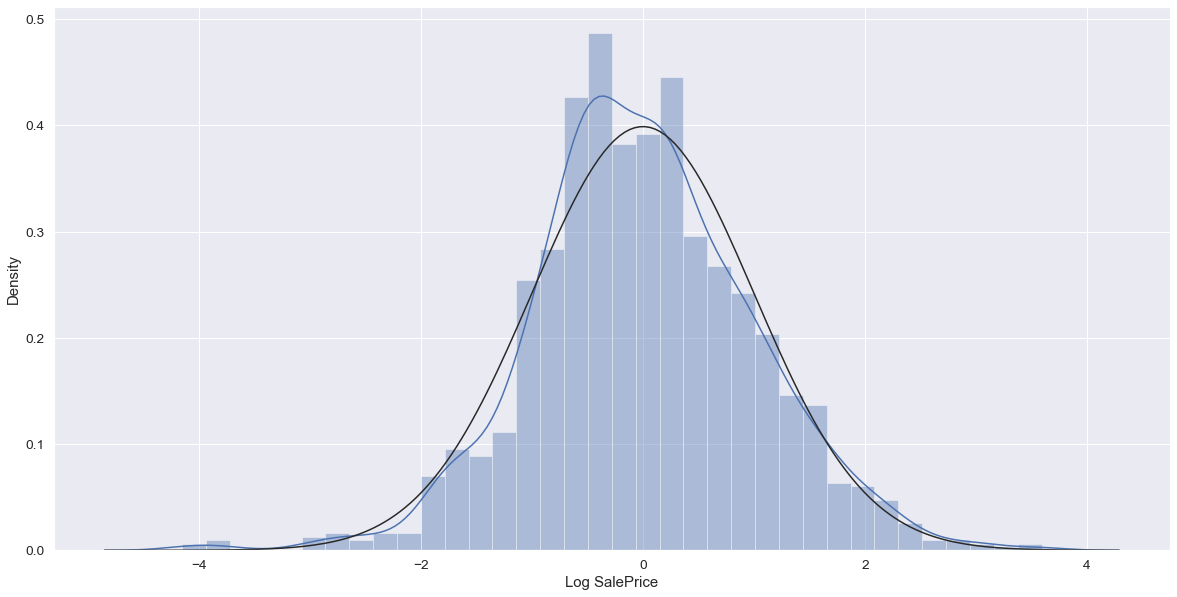

In [183]:
pt_price = PowerTransformer(method = 'yeo-johnson')
price_transform = pt_price.fit_transform(target.values.reshape(-1, 1))
plt.figure(figsize=(20, 10))

sns.distplot(price_transform, kde=True, fit=scipy.stats.norm)
plt.xlabel("Log SalePrice")
plt.show()

In [184]:
train_final = train9.iloc[:train_test_data.index.max() + 1, :].copy()
train_final['SalePrice'] = price_transform
test_final = train9.iloc[train_test_data.index.max() + 1:, :].copy()

In [185]:
X = train_final.drop(['SalePrice'], axis=1)
y = train_final['SalePrice']
train_final
test_final
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [186]:
model_rf = RandomForestRegressor()
model_rf.fit(X_train, y_train)
pred_rf = model_rf.predict(X_test)
result_rf = mean_squared_error(y_test, pred_rf)
result_rf

0.16501793976239926

In [187]:
model_br = BayesianRidge()
model_br.fit(X_train, y_train)
pred_br = model_br.predict(X_test)
result_br = mean_squared_error(y_test, pred_br)
result_br

0.1435187758716731

In [188]:
model_r = Ridge()
model_r.fit(X_train, y_train)
pred_r = model_r.predict(X_test)
result_r = mean_squared_error(y_test, pred_r)
result_r

0.1434613433509755

In [189]:
pred_r = model_r.predict(test_final)
actual_pred = pt_price.inverse_transform(pred_r.reshape(-1, 1))
prediction_result = pd.concat([test0['Id'], pd.DataFrame(actual_pred, columns = ['SalePrice'])], axis=1)
prediction_result.to_csv('./prediction_result.csv', index = False)